# Part 3 - Visualizing spatial data on the map widget

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Adding-single-layer" data-toc-modified-id="Adding-single-layer-1">Adding single layer</a></span><ul class="toc-item"><li><span><a href="#Adding-Web-Layer-to-the-map" data-toc-modified-id="Adding-Web-Layer-to-the-map-1.1">Adding Web Layer to the map</a></span></li><li><span><a href="#Adding-local-and-in-memory-layers-to-the-map" data-toc-modified-id="Adding-local-and-in-memory-layers-to-the-map-1.2">Adding local and in-memory layers to the map</a></span><ul class="toc-item"><li><span><a href="#Add-a-Spatially-Enabled-Data-Frame-(SeDF)" data-toc-modified-id="Add-a-Spatially-Enabled-Data-Frame-(SeDF)-1.2.1">Add a Spatially-Enabled Data Frame (SeDF)</a></span></li><li><span><a href="#Add-an-in-memory-FeatureSet" data-toc-modified-id="Add-an-in-memory-FeatureSet-1.2.2">Add an in-memory FeatureSet</a></span></li><li><span><a href="#Adding-a-local-raster" data-toc-modified-id="Adding-a-local-raster-1.2.3">Adding a local raster</a></span></li></ul></li></ul></li><li><span><a href="#Other-operations" data-toc-modified-id="Other-operations-2">Other operations</a></span><ul class="toc-item"><li><span><a href="#Drawing-graphics-and-geometries" data-toc-modified-id="Drawing-graphics-and-geometries-2.1">Drawing graphics and geometries</a></span><ul class="toc-item"><li><span><a href="#Draw-geometries" data-toc-modified-id="Draw-geometries-2.1.1">Draw geometries</a></span></li><li><span><a href="#Draw-with-symbols-and-pop-ups" data-toc-modified-id="Draw-with-symbols-and-pop-ups-2.1.2">Draw with symbols and pop-ups</a></span></li><li><span><a href="#Draw-sketches-interactively" data-toc-modified-id="Draw-sketches-interactively-2.1.3">Draw sketches interactively</a></span></li></ul></li><li><span><a href="#Customizing-layer-symbology" data-toc-modified-id="Customizing-layer-symbology-2.2">Customizing layer symbology</a></span></li><li><span><a href="#Querying-layers-in-a-map" data-toc-modified-id="Querying-layers-in-a-map-2.3">Querying layers in a map</a></span></li><li><span><a href="#Removing-layers-in-a-map" data-toc-modified-id="Removing-layers-in-a-map-2.4">Removing layers in a map</a></span></li><li><span><a href="#Viewing-legend" data-toc-modified-id="Viewing-legend-2.5">Viewing legend</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3">Conclusion</a></span></li></ul></div>

First, to use the map widget, call `gis.map()` and assign it to a variable that you can then query to bring up the widget in the notebook:

In [1]:
import arcgis
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()


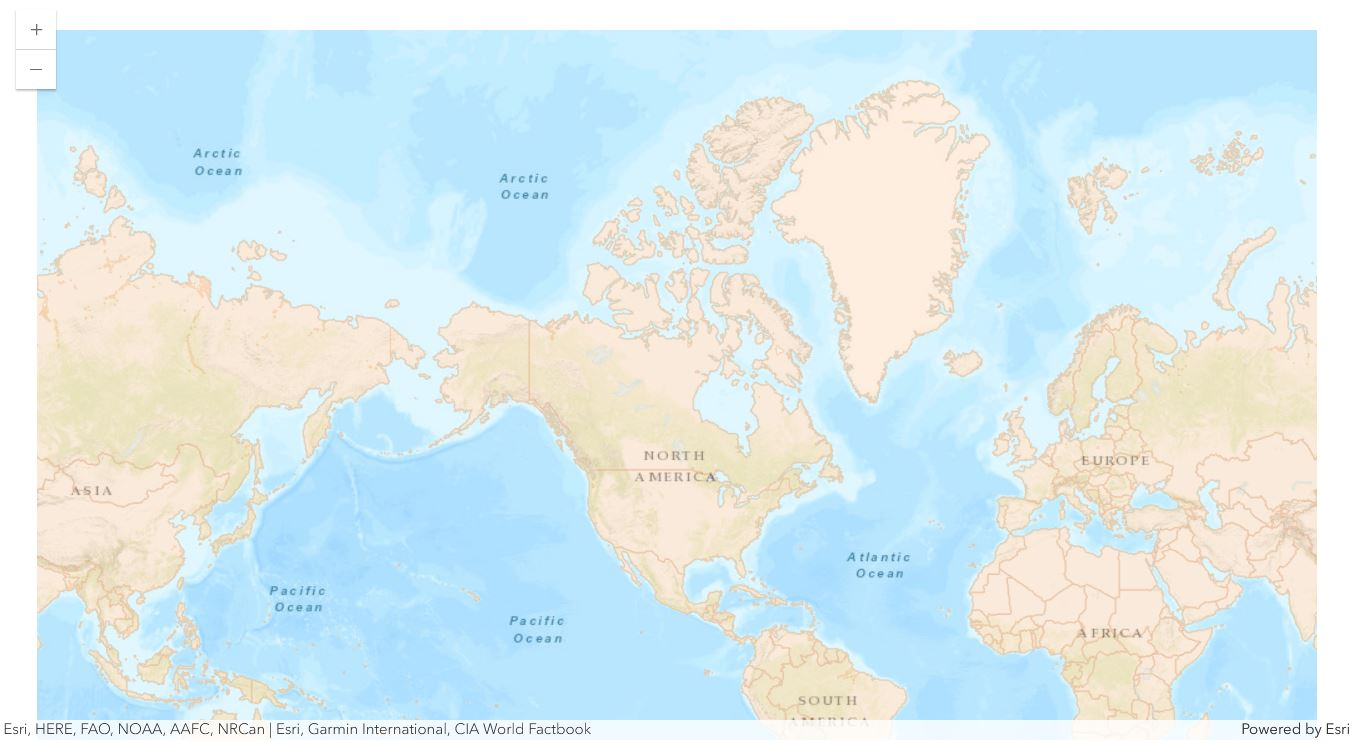

In [91]:
# Create a map widget
map1 = gis.map('USA') # Passing a place name to the constructor
                        # will initialize the extent of the map.
map1

## Adding single layer

### Adding Web Layer to the map

You can add a number of different layer objects, such as `FeatureLayer`, `FeatureCollection`, `ImageryLayer`, or `MapImageLayer`, to the map. For instance, you can use the following cell to add a `FeatureLayer`:

In [6]:
world_countries_item = gis.content.get('ac80670eb213440ea5899bbf92a04998')
world_countries_layer = world_countries_item.layers[0]
world_countries_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">

In [9]:
map1.content.add(world_countries_layer, options={'opacity':0.4})

Similar to `FeatureLayers`, you can also add `ImageryLayers` items. You can also specify either a built-in raster function or a custom one for rendering.


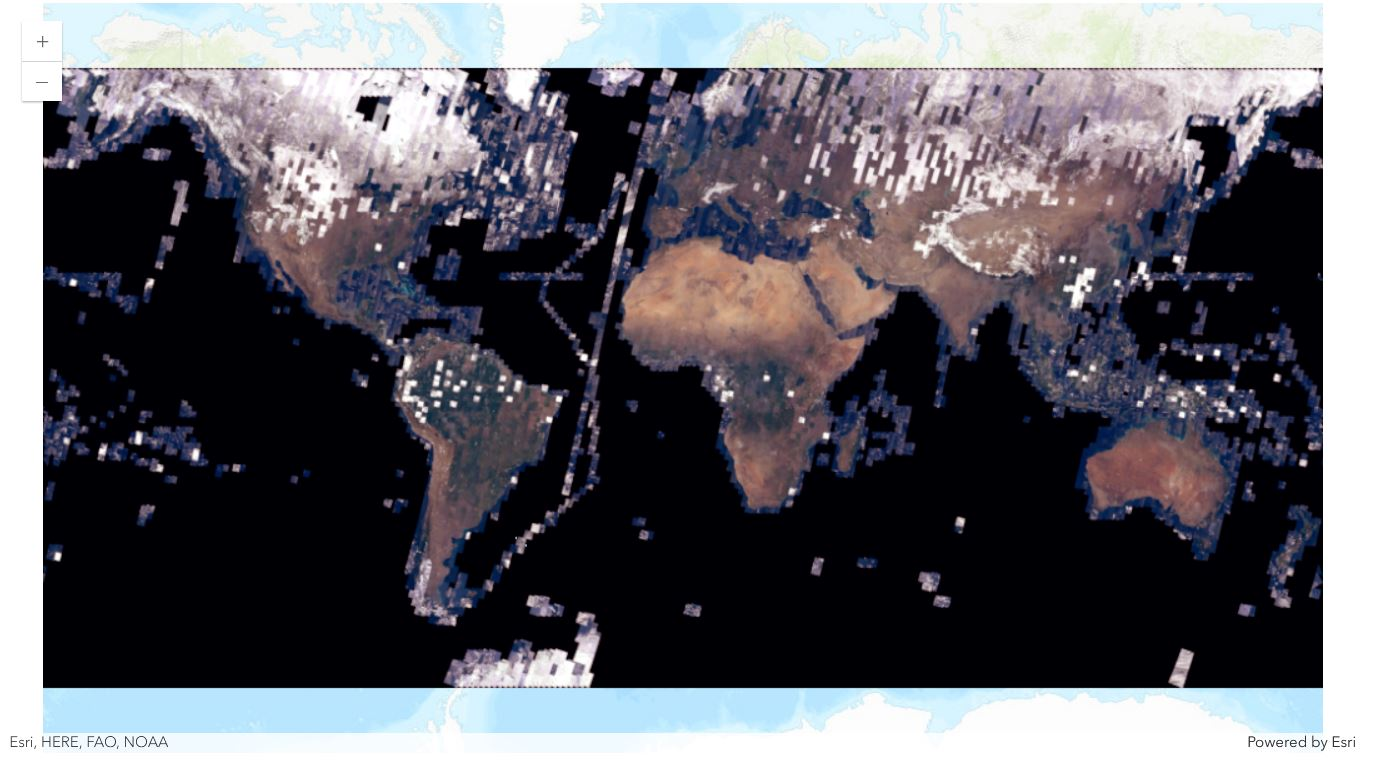

In [96]:
map2 = gis.map('USA') # Passing a place name to the constructor
                        # will initialize the extent of the map.
map2

In [93]:
landsat_item = GIS().content.search("Landsat 8 Views", "Imagery Layer", max_items=2)[0]
landsat_item

<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>

In [7]:
map2.content.add(landsat_item)

To zoom to one or more layers, call the `zoom_to_layer()` method and pass a layer or list of layers that you want to snap your map to. The supplied item can be a single instance or a list of an `Item`, `Layer`, `DataFrame`, `FeatureSet`, or `FeatureCollection`.

The code below shows how to zoom to a single layer:

In [94]:
map2.content.add(landsat_item)
map2.zoom_to_layer(landsat_item)


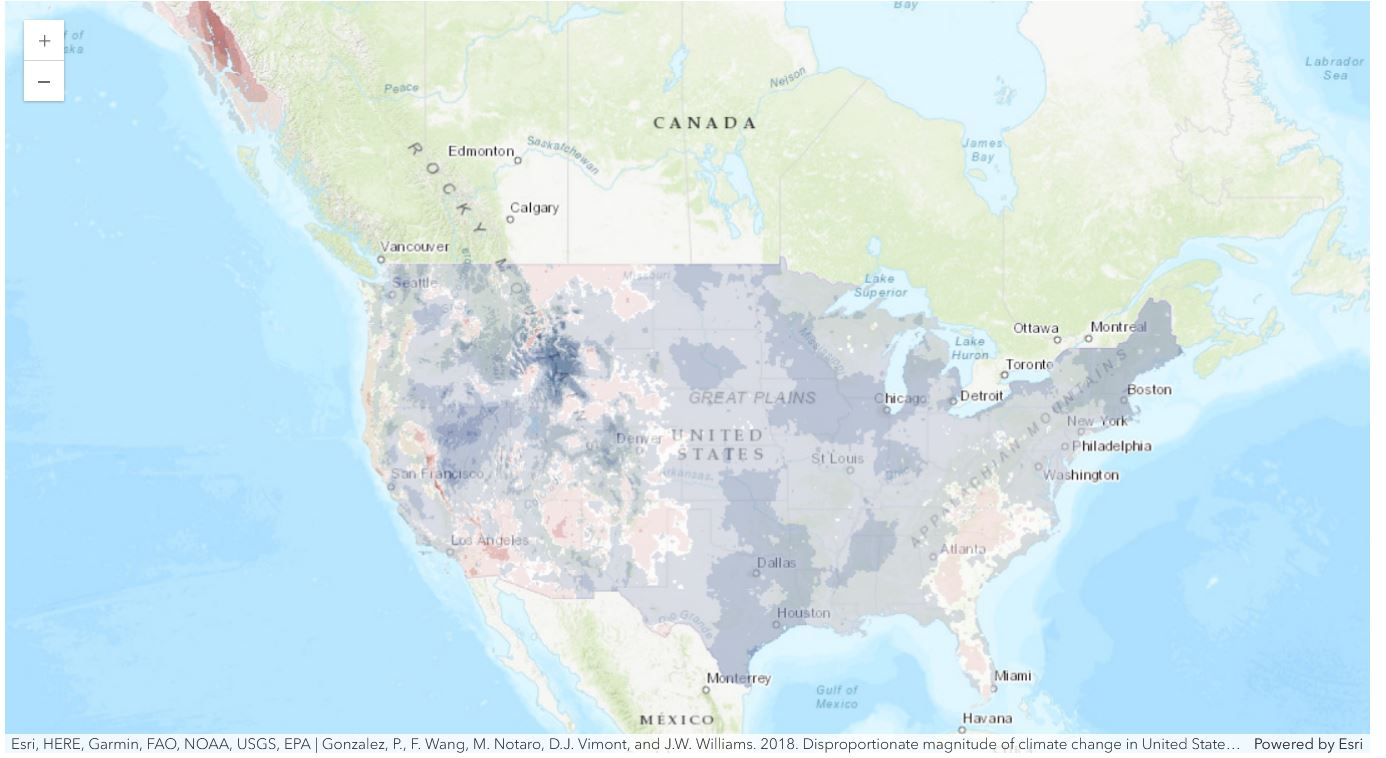

In [17]:
map3 = gis.map('USA') # Passing a place name to the constructor
                        will initialize the extent of the map.
map3

In [14]:
prep_item = GIS().content.search("Precipitation", "Map Image Layer", max_items=2)[1]
prep_item

<Item title:"U.S. Historical Precipitation Trends 1985 to 2010" type:Map Image Layer owner:DSCGIS>

In [15]:
prep_layer = prep_item.layers[1]
prep_layer

<MapRasterLayer url:"https://tiles.arcgis.com/tiles/fBc8EJBxQRMcHlei/arcgis/rest/services/U_S__Historical_Precipitation_Trends_1985_to_2010/MapServer/1">

In [16]:
map3.content.add(prep_item)
map3.zoom_to_layer(prep_layer)

### Adding local and in-memory layers to the map 

#### Add a Spatially-Enabled Data Frame (SeDF)

We can read census data on major cities and load the data into a `Spatially Enabled DataFrame (SeDF)`, which will then allow us to visualize the points by calling the `plot()` method off the `SeDF`'s spatial accessor and passing the map you created to it.

In [18]:
# create an anonymous connection to ArcGIS Online and get a public item
census_item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
census_flayer = census_item.layers[0]

# Specify a SQL query and get a sub-set of the original data as a DataFrame
census_df = census_flayer.query(where="AGE_45_54 < 450").sdf

# Visualize the top 5 records
census_df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,306,Purdue University,Census Designated Place,IN,18,1862388,,6,12365,12183,...,244,9,23,491,2.66,1362,104,4,1254,"{""x"": -9676280.259129459, ""y"": 4928486.7435240..."
1,600,Stanford,Census Designated Place,CA,06,0673906,,6,15179,13809,...,689,13,32,1230,2.77,3999,86,790,3123,"{""x"": -13599607.21449169, ""y"": 4498534.6279709..."
2,682,Fort Carson,Census Designated Place,CO,08,0827370,,6,13891,13813,...,319,39,421,2319,3.59,2629,180,15,2434,"{""x"": -11664455.032700792, ""y"": 4684537.534384..."
3,742,Storrs,Census Designated Place,CT,09,0973980,,6,15569,15344,...,276,14,18,489,2.69,1737,166,592,979,"{""x"": -8043406.213645851, ""y"": 5131741.8140288..."
4,1035,Camp Pendleton South,Census Designated Place,CA,06,0610561,,6,10450,10616,...,389,37,169,2500,3.69,2865,296,11,2558,"{""x"": -13066535.250599463, ""y"": 3925680.810605..."



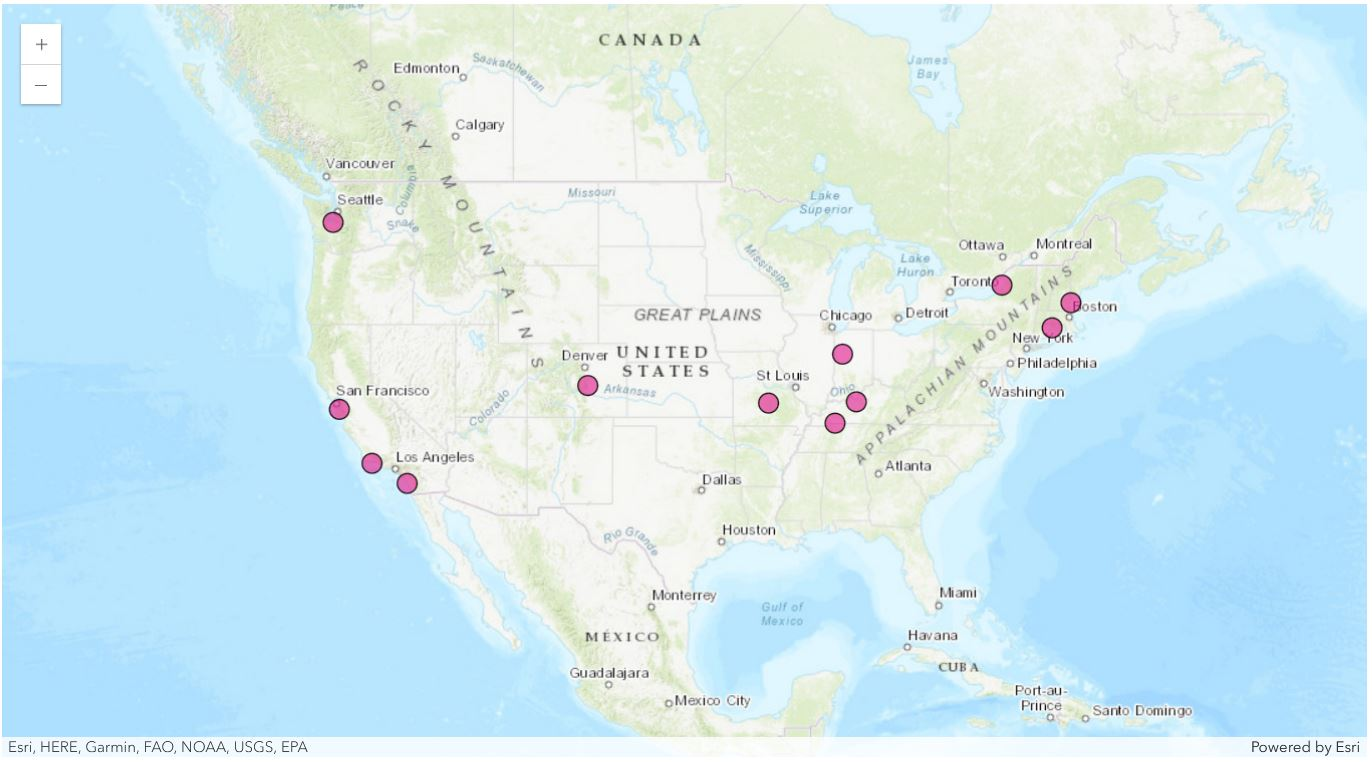

In [22]:
map4 = GIS().map("United States")
map4

In [20]:
map4.zoom = 4
map4.center = [39,-98]

In [21]:
census_df.spatial.plot(map_widget= map4)

True

#### Add an in-memory FeatureSet

Besides adding in the the `SeDF`, we can also add a `FeatureSet`. For example, below we will search for the USA freeway layer and visualize it by adding it to the map widget as a `FeatureSet` object returned by the query method. Once added, we then draw it with default line symbols.

In [23]:
freeway_item = gis.content.search('title:USA Freeway System AND owner:esri_dm', 
                                   item_type = 'Feature Layer')[0]
freeway_item

<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>

In [24]:
freeway_sdf = freeway_item.layers[0]
freeway_fset = freeway_sdf.query(where="DIST_KM>2800", as_df=False)
freeway_fset

<FeatureSet> 7 features


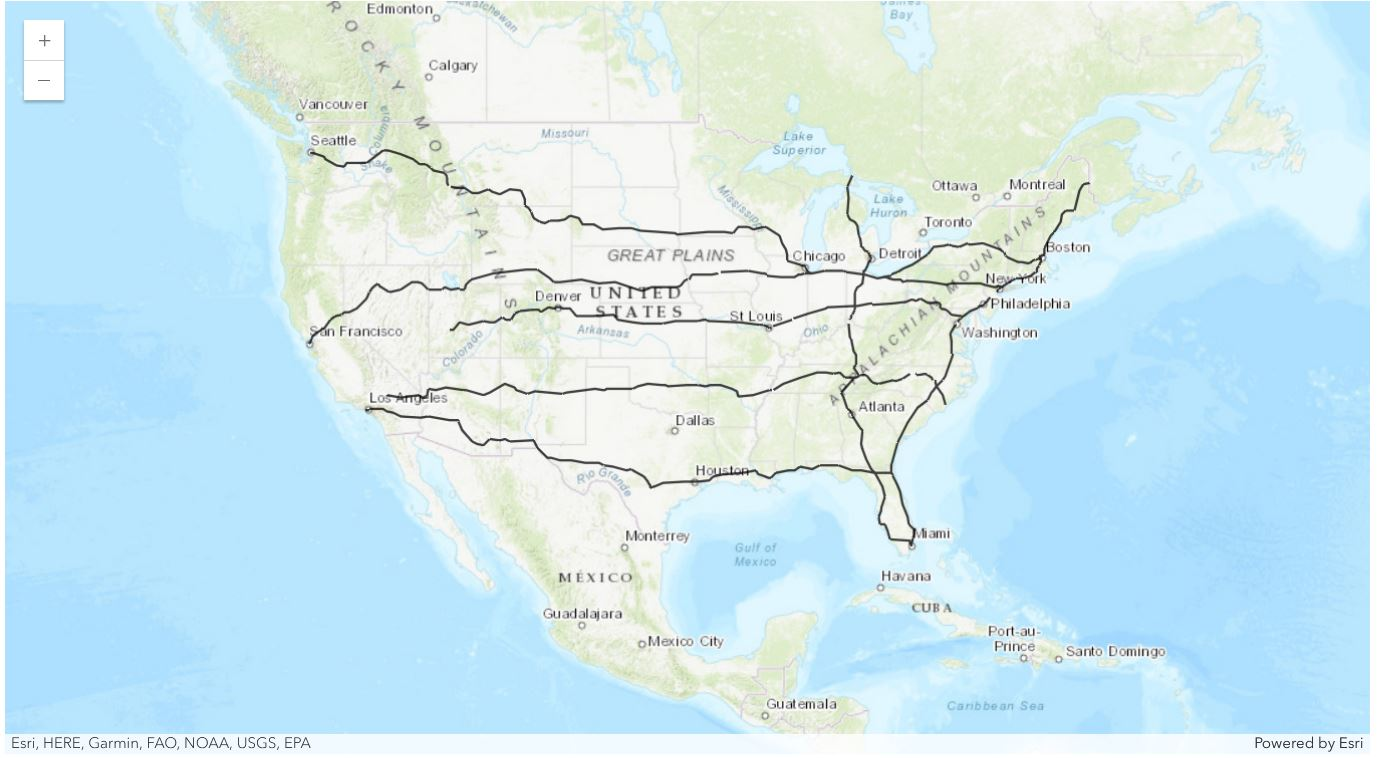

In [79]:
map5 = gis.map('USA')
map5

In [80]:
map5.zoom = 6
map5.center = [39,-98]

In [81]:
map5.content.add(freeway_fset, options={'opacity':0.75})

#### Adding a local raster

A local raster can be read into the map widget as a `numpy` array with `arcgis.raster` imported on the machine.

<div class="alert alert-info">
  <b>Note:</b> Local raster can only be loaded for display when `arcpy` is installed on the current environment.
</div>

In [30]:
import numpy
import matplotlib.pyplot as plt
from arcgis.raster import Raster


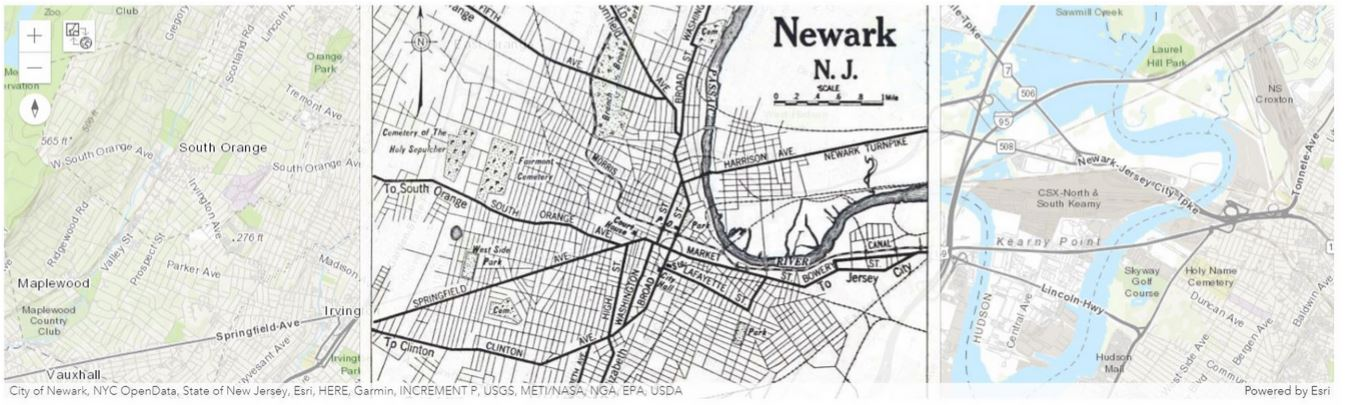

In [31]:
map6 = GIS().map("Newark, NJ")
map6

In [ ]:
raster = Raster(r'../../static/img/newark_nj_1922.jpg',
                extent = {"xmin":-74.22655,
                          "ymin":40.712216,
                          "xmax":-74.12544,
                          "ymax":40.773941,
                          "spatialReference":{"wkid":4326}},
               opacity = 0.85)
map6.content.add(raster)

To immediately release the in-app memory immediate, run the follow cell to remove the raster layer:

In [26]:
map6.content.remove(0)

True

## Other operations

### Drawing graphics and geometries

#### Draw geometries


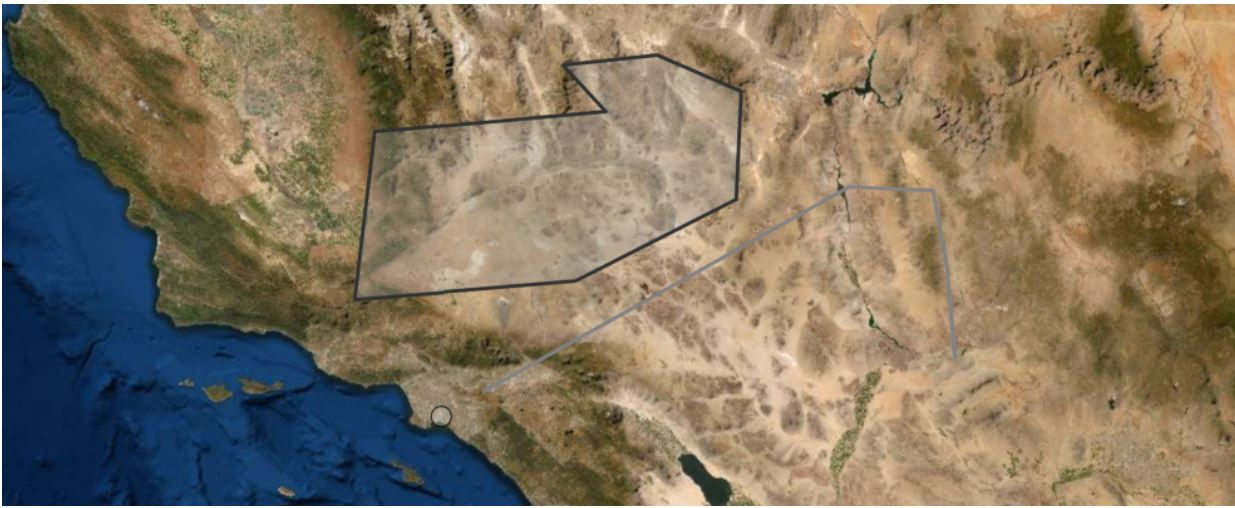

In [38]:
map7 = gis.map("Port of Long Beach")
map7.basemap.basemap = "satellite"
map7

When it comes to adding geometries, we can either create a geometry object and use the `draw` method to apply the object onto our display, or we can input `point`, `polyline`, or `polygon` as keywords in the `draw()` method, which will then trigger a user interactive drawing session on the widget.

In [33]:
map7.zoom = 6

In [34]:
from arcgis.geometry import Geometry

pt = Geometry({"x" : -118.15, "y" : 33.80, 
            "spatialReference" : {"wkid" : 4326}})

In [35]:
map7.content.draw(pt)

In [36]:
line = Geometry({
    "paths":[
        [[-118.38, 33.82], [-118.38, 33.92], [-118.18, 33.92]]
    ],
    "spatialReference":{"wkid":4326}
})
map7.content.draw(line)

In [37]:
polygon = Geometry({
    "rings":[
        [[-118.38, 33.82], [-118.38, 33.92], [-118.18, 33.92], [-118.18, 33.82]]
    ],
    "spatialReference":{"wkid":4326}
})
map7.content.draw(polygon)

#### Draw with symbols and pop-ups

The `draw()` method can be used to draw a deterministic shape on the map widget when the input shape is a known `Geometry` object, a list of coordinate pairs, a `FeatureSet`, or a `dict` object that represents a geometry. The other way to use `draw` is to provide users with an interactive sketch and display experience when the input shape is one of the expected strings, e.g. "circle", "ellipse", "Polygon", "Polyline", "MultiPoint", "Point", "rectangle", "triangle".


```
draw(shape, popup=None, symbol=None, attributes=None)
# The draw method draws a shape on the map widget.
```

> **Note:** Anything can be drawn from known `Geometry` objects, coordinate pairs, and `FeatureSet` objects.


The `shape` argument can be one of the below objects. See [`MapContent.draw() reference](/python/latest/api-reference/arcgis.map.toc.html#arcgis.map.map_widget.MapContent.draw) for details:
 - Known `Geometry` objects: Shape is one of the following: circle, ellipse, Polygon, Polyline, MultiPoint, Point, rectangle, triangle.  
 - [Coordinate pair](/python/api-reference/arcgis.geometry.html#arcgis.geometry.MultiPoint.coordinates): specified shape as a list of [lat, long]. Eg: [34, -81]  
 - `FeatureSet`: shape can be a FeatureSet object.
 - `Dict` object representing a `geometry`.

The `popup` parameter is optional, and if it used, it must be a `dict` containing title and content as keys that will be displayed when the shape is clicked. In the case of a `FeatureSet`, title and content are names of attributes of the features in the `FeatureSet`, rather than actual string values for title and content.

The `symbol` parameter is also optional, and if it is used, it should be a `dict` object. See the [Symbol Objects](/rest/services-reference/enterprise/symbol-objects) page in the ArcGIS REST API documentation for more information. A default symbol is used if one is not specified. A helper utility to get the symbol format for several predefined symbols is available within the Esri symbol selector.

The `attributes` parameter is again optional, and if it is used, it should be a `dict` object that specifies a `dict` containing name value pairs of fields and field values associated with the graphic.

The examples we have seen so far have not been applied with customized symbols and pop-ups. Next, let's follow a quick example that visualizes a predefined Point object with the `symbol` parameter and draws the nearby hospitals with customized symbols and a self-defined `pop-up`:


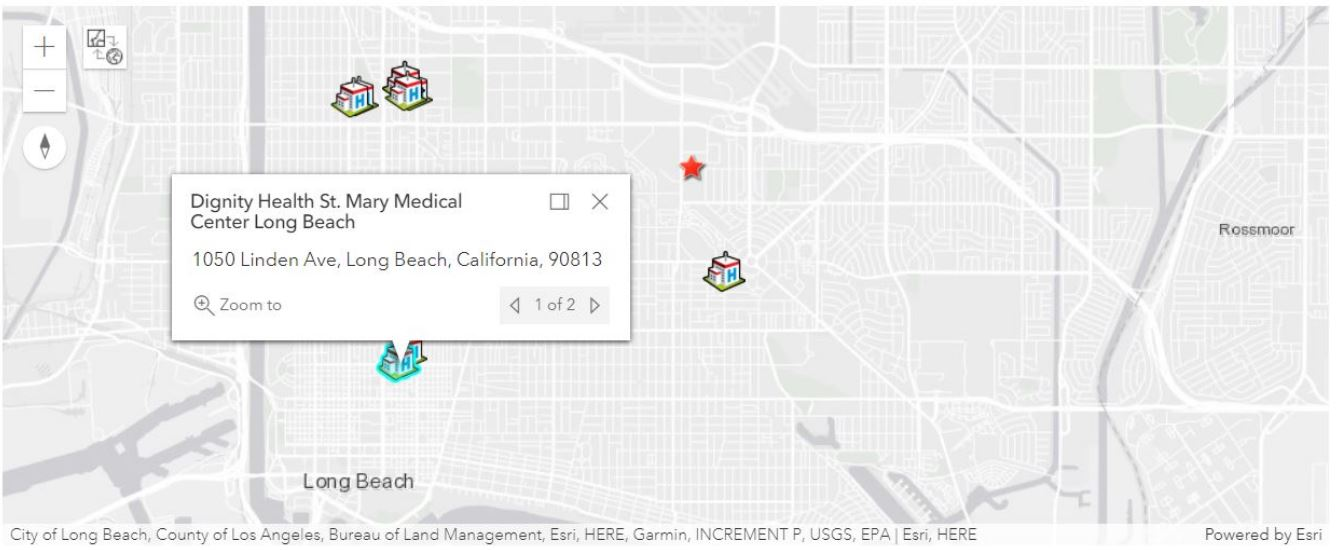

In [45]:
from arcgis.gis import GIS
map7b = GIS().map("Port of Long Beach")
map7b.basemap.basemap ='gray-vector'
map7b

In [40]:
map7b.zoom

15.0

In [41]:
from arcgis.map.symbols import PictureMarkerSymbolEsriPMS
from arcgis.map.popups import PopupInfo

house_symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/Shapes/RedStarLargeB.png",
                "contentType":"image/png","width":24,"height":24})
map7b.content.draw(pt, symbol=house_symbol)

Now, let's use the `geocode` method to find a list of 10 hospitals near the defined Point object:

In [42]:
from arcgis.geocoding import geocode
hospitals = geocode('hospital', location=[-118.15, 33.80], max_locations=10)
len(hospitals)

10

In [43]:
hospitals[0]['attributes']['X']

-118.145887142854

In [44]:
hospital_symbol = PictureMarkerSymbolEsriPMS(angle = 0, xoffset = 0, yoffset = 0,
                   url = "http://static.arcgis.com/images/Symbols/SafetyHealth/Hospital.png",
                   content_type = "image/png", width = 24, height = 24)
hospital_symbol.type = "esriPMS"


for place in hospitals:
    popup= PopupInfo(**{"title" : place['attributes']['PlaceName'], 
           "description" : place['attributes']['Place_addr']})
    location = Geometry({"x" : place['attributes']['X'], "y" : place['attributes']['Y'], 
            "spatialReference" : {"wkid" : 4326}})
    map7b.content.draw(location, symbol=hospital_symbol, popup=popup)

#### Draw sketches interactively

You can draw or sketch graphics on the map interactively using the `draw()` method. For instance, you can draw and annotate `rectangles`, `ellipses`, `arrow marks`, etc. as shown below:


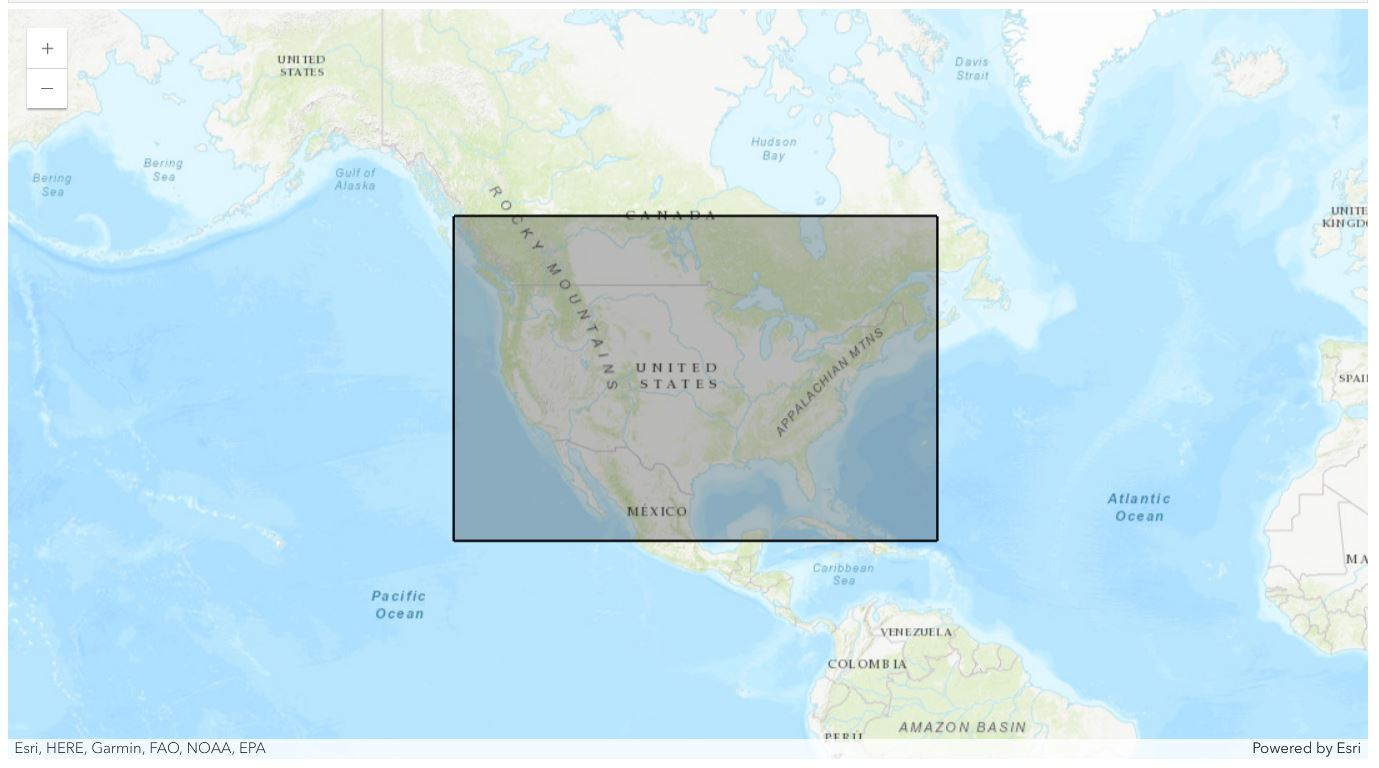

In [51]:
usa_map = GIS().map("USA")
usa_map

In [47]:
# create rectangle geometry
from arcgis.geometry import Geometry
usa_polygon = Geometry({
    "rings" : [[[-131, 55], [-131, 20], [-63, 20], [-63, 55]]],
    "spatialReference" : {"wkid" : 4326}
})
usa_map.content.draw(usa_polygon)

In [50]:
usa_map.zoom = 3
usa_map.center = [39,-98]

If the graphics are no longer needed, you can use the `.content.remove()` method to remove them.

In [48]:
usa_map.content.remove(0)

True

### Customizing layer symbology

While calling the `.content.add()` method, you can specify a set of renderer instructions as a dictionary to the `options` parameter. You have seen how to set the transparency for a layer in previous cells. The `opacity` value ranges from 0 - 1, with 0 being fully transparent and 1 being fully opaque.

You can make use of the `"smart mapping"` capability to render feature layers with symbology that varies based on an attribute field of that layer. The cell below adds the "USA Freeway System" layer to the map and changes the width of the line segments based on the length of the freeway. Unlike in `map5` where freeways are classified in sizes, here you will see freeways classified in colors. For more, checkout <a href="https://www.esri.com/en-us/arcgis/products/mapping/smart-mapping">smart mapping</a>.


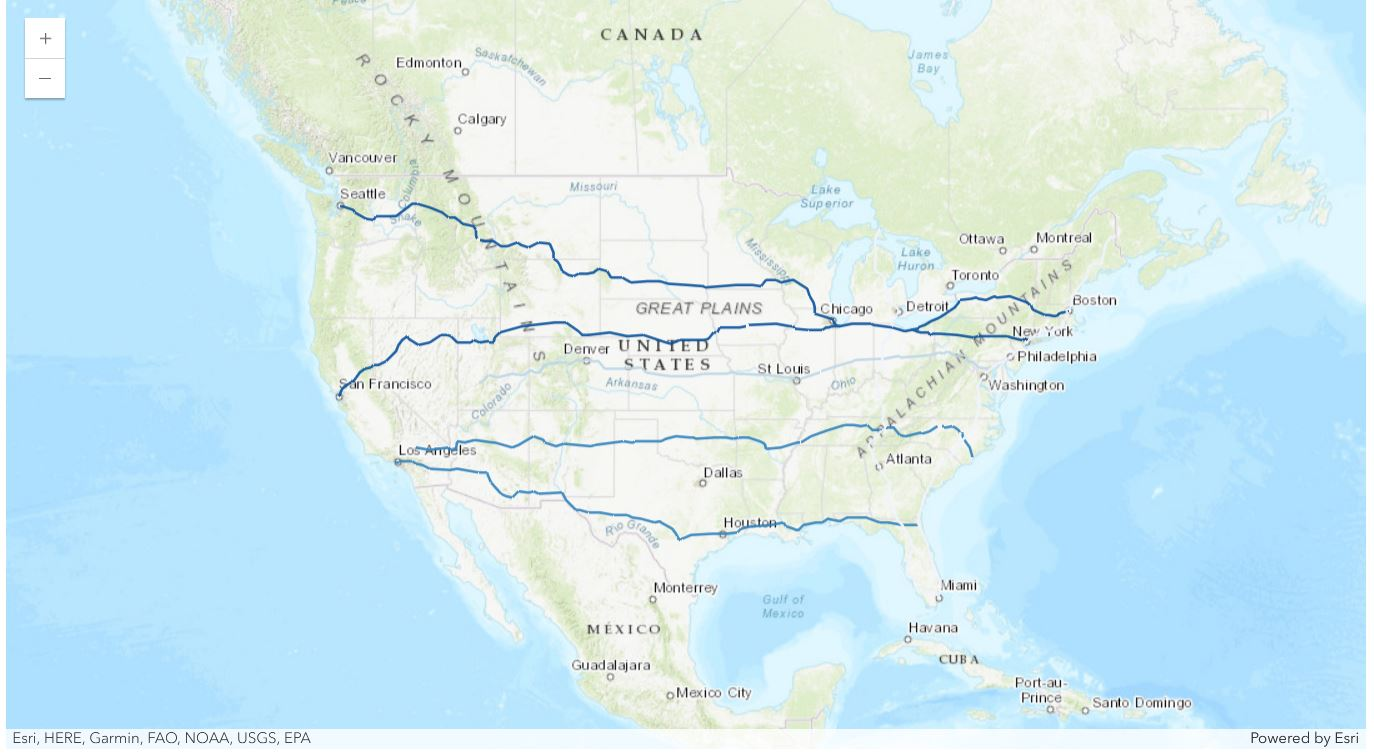

In [76]:
map5b = gis.map('USA')
map5b

In [73]:
map5b.zoom = 4
map5b.center = [39,-98]

In [74]:
map5b.content.add(freeway_fset, options={'opacity':0.9})

In [75]:
sm_manager = map5b.content.renderer(0).smart_mapping()
sm_manager.class_breaks_renderer(break_type='color', field="DIST_KM")

### Querying layers in a map 

You can list the layers added to the map using the `content.layers` property.

In [77]:
map1.content.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">]

In [82]:
map5.content.layers

[<FeatureCollection>]

### Removing layers in a map

To remove one or more layers, call the `.content.remove()` method and pass a list of layers that you want removed. To get a list of valid layers that can be removed, call the `.content.layers` property as shown in the previous cell.

The code below shows how to remove the USA freeways layer:

In [88]:
map1.content.remove(0)

True

### Viewing legend

Enable the display of a `legend` on the map widget by setting the boolean to `True`:

In [89]:
map5b.legend.enabled = True

Finally, you can turn the legend display off when it no longer needed by executing the following cell:

In [90]:
map5b.legend.enabled = False

## Conclusion

In Part 3 of this guide series, we have explored how to add single layers (`Web Layer`, local raster, or an in-memory `SeDF`) to a map, how to draw graphics and geometries, and how to perform other visualization operations. In the next chapter, we will explore how to display time-enabled data, the nature of drawing with the ArcGIS API for Javascript, and the best practices when rendering a large number of layers in a single map widget.

<a href="#Part-3---Visualizing-spatial-data-on-the-map-widget">Back to Top</a>